In [59]:
# Import fundamental tools for subsetting/plotting data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [95]:
import sys
!{sys.executable} -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 8.4/376.0 MB 43.5 MB/s eta 0:00:09
   - -------------------------------------- 17.6/376.0 MB 42.6 MB/s eta 0:00:09
   -- ------------------------------------- 27.5/376.0 MB 42.6 MB/s eta 0:00:09
   --- ------------------------------------ 37.0/376.0 MB 42.7 MB/s eta 0:00:08
   ---- ----------------------------------- 43.8/376.0 MB 41.0 MB/s eta 0:00:09
   ----- ---------------------------------- 52.4/376.0 MB 41.7 MB/s eta 0:00:08
   ----- ---------------------------------- 53.7/376.0 MB 36.0 MB/s eta 0:00:09
   ------ --------------------------------- 61.1/376.0 MB 35.7 MB/s eta 0:00:09
   ------- -------------------------------- 67.9/376.0 MB 35.5 MB/s eta 0:00:09
   ------- -------------------------------- 74.7/376.0 MB 35.3 MB/s eta 0:00:09
   -------- ------------------------------- 81.5/376

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [100]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [60]:
import sys
!{sys.executable} -m pip install gdown

Defaulting to user installation because normal site-packages is not writeable


In [61]:
# Block to access the csv file without existing local copy
import gdown

# Google Drive file ID from my private drive
file_id = '1L_k-u6Fwbs_0LAWzgDxIlCiwmFDV8ZUE'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'Housing.csv'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1L_k-u6Fwbs_0LAWzgDxIlCiwmFDV8ZUE
To: C:\Users\Charles Jung\Documents\GitHub\HousePricingPredictor\Housing.csv
100%|█████████████████████████████████████████████████████████████████████████████████████| 30.0k/30.0k [00:00<?, ?B/s]


'Housing.csv'

In [62]:
# Load the CSV
df = pd.read_csv(output)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [64]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [65]:
backup_df = df.copy()

In [66]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [67]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [68]:
numerical_cols = list(df.select_dtypes(include=[np.number]))
print(numerical_cols)

categorical_cols = list(df.select_dtypes(include='object'))
print(categorical_cols)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


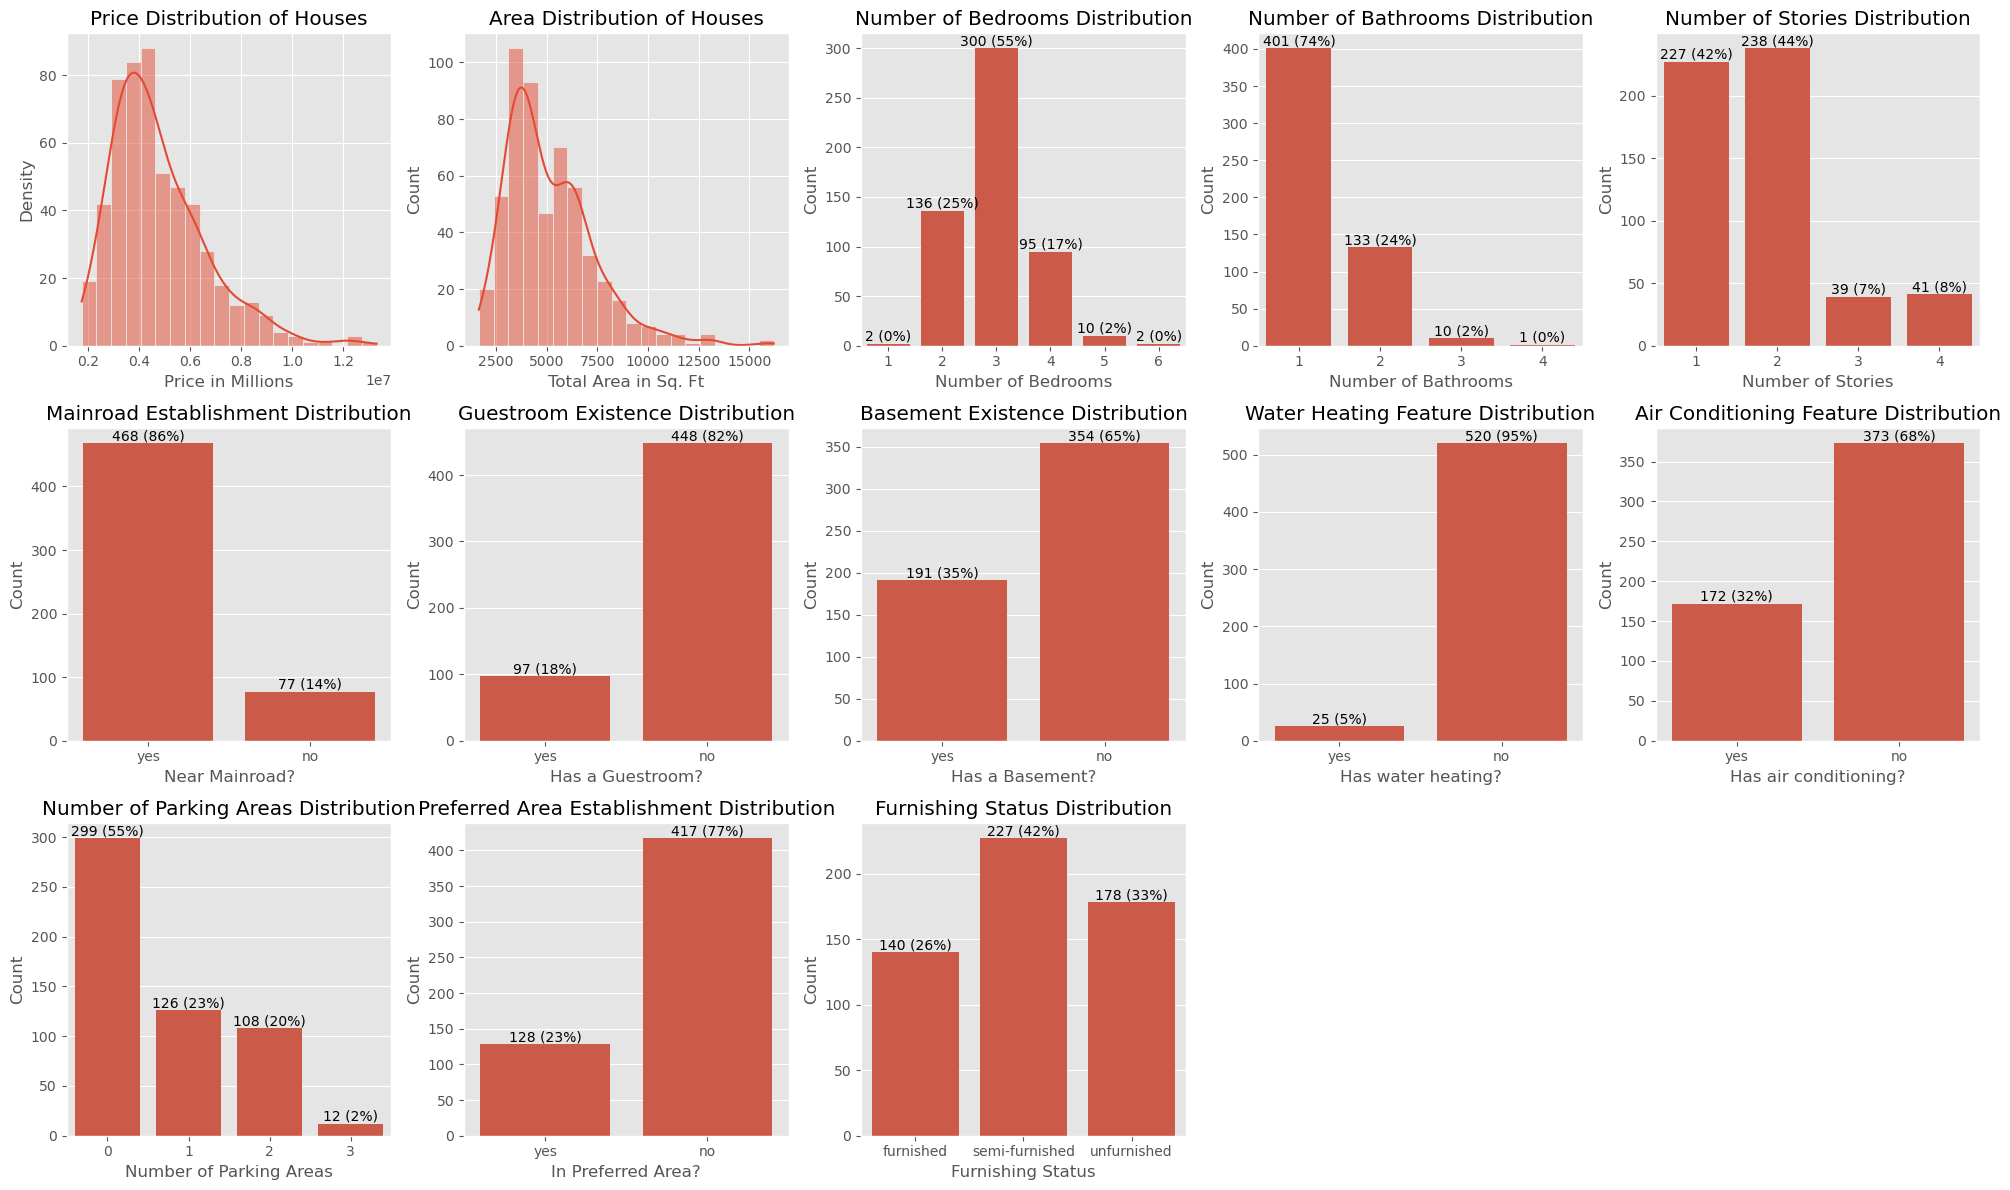

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,12))
axes = axes.ravel()

custom_labels = {
    'price' : ('Price Distribution of Houses', 'Price in Millions', 'Density'),
    'area' : ('Area Distribution of Houses', 'Total Area in Sq. Ft', 'Count'),
    'bedrooms' : ('Number of Bedrooms Distribution', 'Number of Bedrooms', 'Count'),
    'bathrooms' : ('Number of Bathrooms Distribution', 'Number of Bathrooms', 'Count'),       
    'stories' : ('Number of Stories Distribution', 'Number of Stories', 'Count'),
    'mainroad' : ('Mainroad Establishment Distribution', 'Near Mainroad?', 'Count'),
    'guestroom' : ('Guestroom Existence Distribution', 'Has a Guestroom?', 'Count'),
    'basement' : ('Basement Existence Distribution', 'Has a Basement?', 'Count'),
    'hotwaterheating' : ('Water Heating Feature Distribution', 'Has water heating?', 'Count'),
    'airconditioning' : ('Air Conditioning Feature Distribution', 'Has air conditioning?', 'Count'),
    'parking' : ('Number of Parking Areas Distribution', 'Number of Parking Areas', 'Count'),
    'prefarea' : ('Preferred Area Establishment Distribution', 'In Preferred Area?', 'Count'),
    'furnishingstatus' : ('Furnishing Status Distribution', 'Furnishing Status', 'Count'),
}

columns = list(custom_labels.keys())
numerical_cols = list(df.select_dtypes(include=[np.number]))
categorical_cols = list(df.select_dtypes(include='object'))

for i, col in enumerate(columns):
    ax = axes[i]
    title, xlabel, ylabel = custom_labels[col]
    
    if col in numerical_cols:
        if col == 'price' or col == 'area':
            sns.histplot(data=df[col], kde=True, bins=20, ax=ax)
        else:
            order = sorted(df[col].unique())
            ax = sns.countplot(data=df, x=col, ax=ax)
            abs_values = df[col].value_counts().reindex(order)
            rel_values = df[col].value_counts(normalize = True).reindex(order) * 100
            lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
            ax.bar_label(container=ax.containers[0], labels=lbls)
            

    elif col in categorical_cols:
        order = ['yes', 'no']
        if col == 'furnishingstatus':
            order = ['furnished', 'semi-furnished', 'unfurnished']
        ax = sns.countplot(data=df, x=col, ax=ax, order=order)
        abs_values = df[col].value_counts().reindex(order)
        rel_values = df[col].value_counts(normalize = True).reindex(order) * 100
        lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
        ax.bar_label(container=ax.containers[0], labels=lbls)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the graphs, we can observe the following:
-Most house prices lie at about 4 million dollars. This means the central tendency is around that value.
-Most houses are also around the 3000-4000 sq. ft range
-House prices seem to be right skewed, same with total area in sq. feet. This means that for these two, it is better to use median as a measure of central tendency. Might need to transform data to log for regression models.

In [70]:
amenity_cols = ['mainroad', 'guestroom', 'basement',
                'hotwaterheating', 'airconditioning', 'prefarea']

temp_amenities = df[amenity_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

df['amenity_score'] = temp_amenities.sum(axis=1)

df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,amenity_score
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,3
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,2
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,2
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0


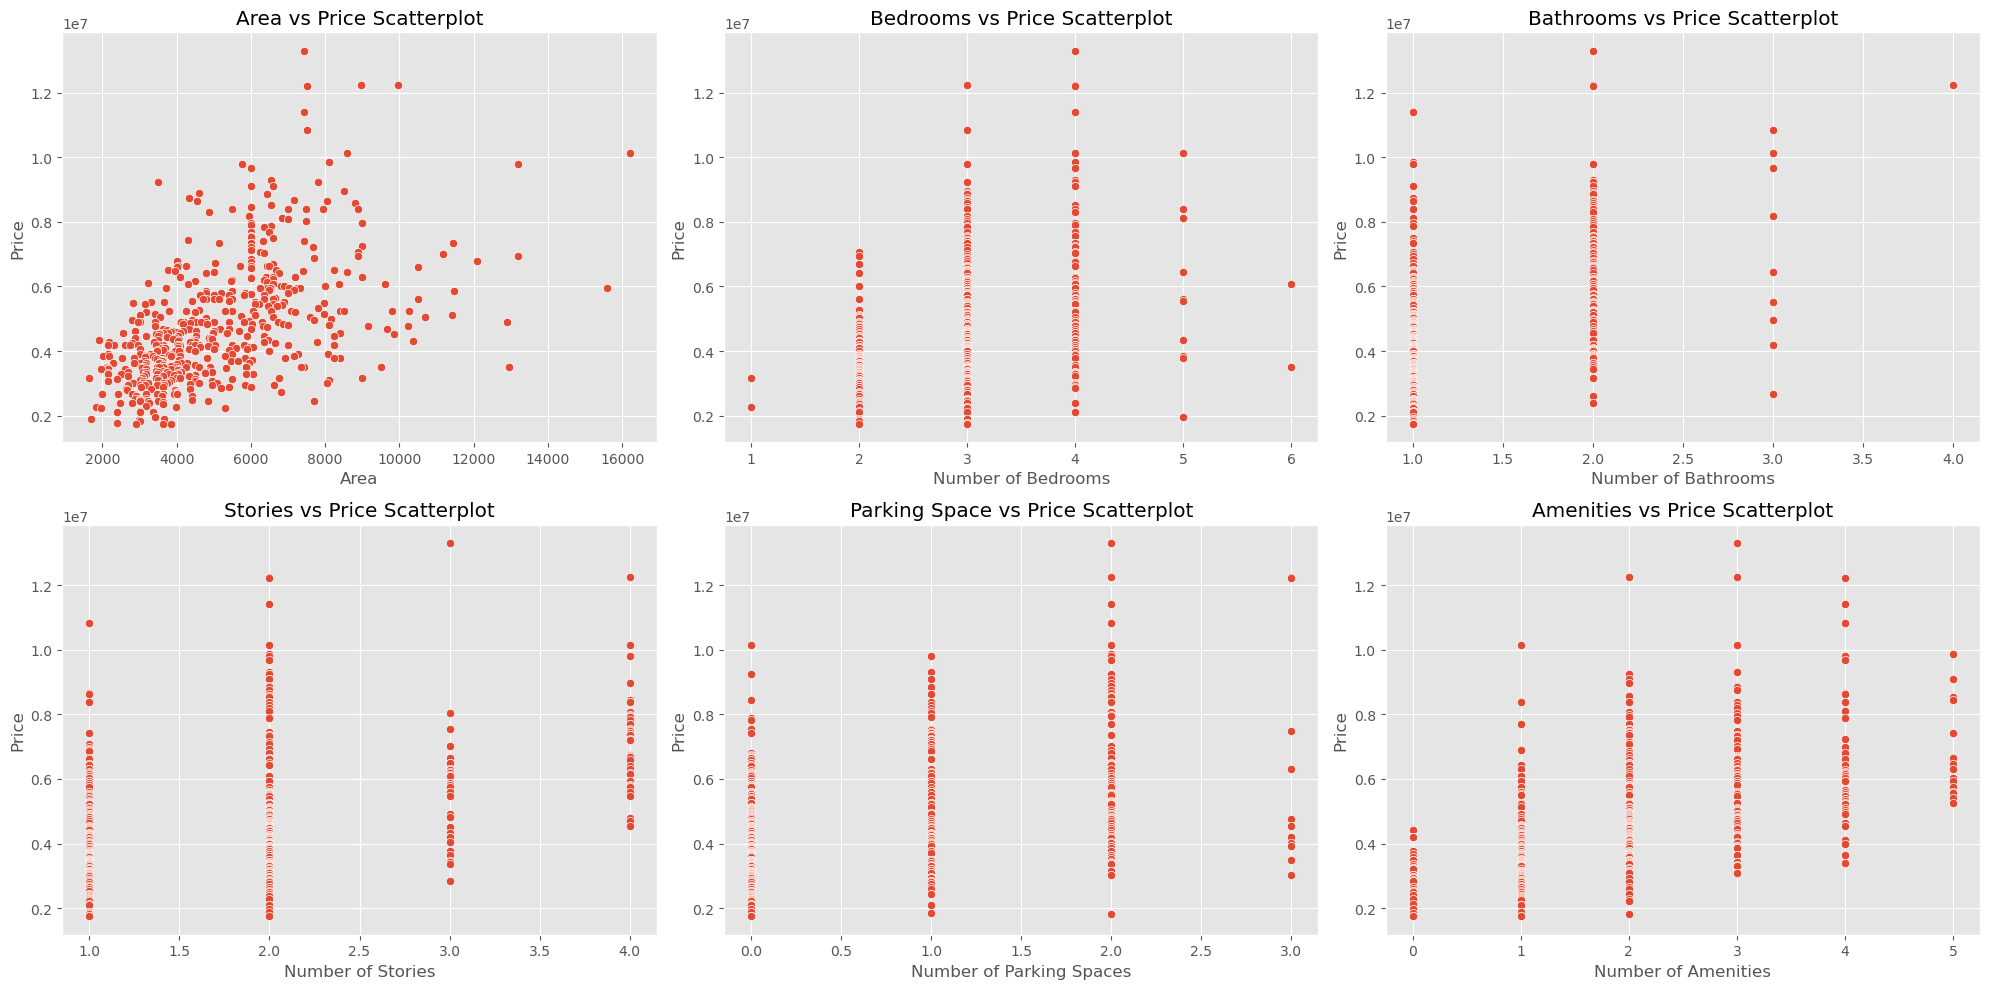

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes = axes.ravel()

custom_labels = {
    'area' : ('Area vs Price Scatterplot', 'Area', 'Price'), 
    'bedrooms' : ('Bedrooms vs Price Scatterplot', 'Number of Bedrooms', 'Price'),
    'bathrooms' : ('Bathrooms vs Price Scatterplot', 'Number of Bathrooms', 'Price'),
    'stories' : ('Stories vs Price Scatterplot', 'Number of Stories', 'Price'),
    'parking' : ('Parking Space vs Price Scatterplot', 'Number of Parking Spaces', 'Price'),
    'amenity_score' : ('Amenities vs Price Scatterplot', 'Number of Amenities', 'Price')
}

columns = list(custom_labels.keys())
numerical_cols = list(df.select_dtypes(include=[np.number]))

for i, col in enumerate(columns):
    ax = axes[i]
    title, xlabel, ylabel = custom_labels[col]

    if col in numerical_cols:
        sns.scatterplot(ax=ax, data=df, x=col, y='price')
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Takeaway from the scatterplot:
-Larger area seems to have a positive correlation with house prices
-Other numerical variables seem to not have as strong of an influence. Testing using correlation heatmap is recommended.

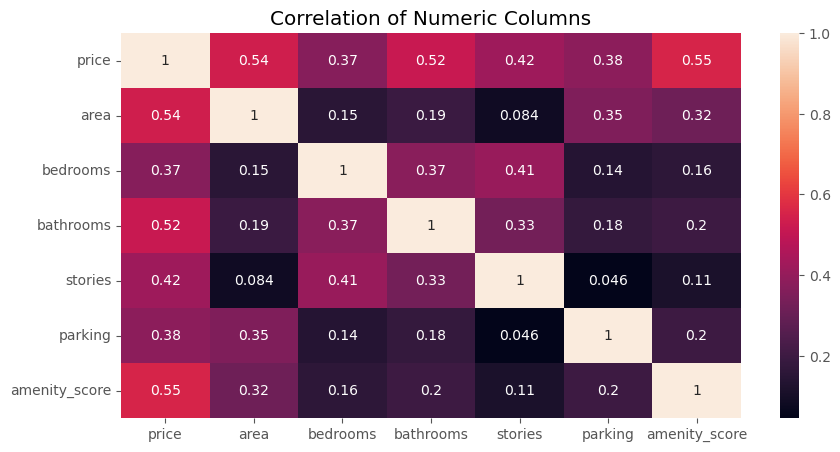

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.heatmap(df[numerical_cols].corr(), annot=True)
axes.set_title('Correlation of Numeric Columns')
plt.show()

From the correlation heatmap, we can infer the following:
-The correlation between Price and Area seem to be quite strong compared to other variables, but not necessarily direct.
-Interestingly, more bathrooms correlate with higher prices.
-In general, more amenities(airconditioning, hotwater, good location, etc.) are correlated positively with price
-Other correlation factors seem to be weaker in relation to price

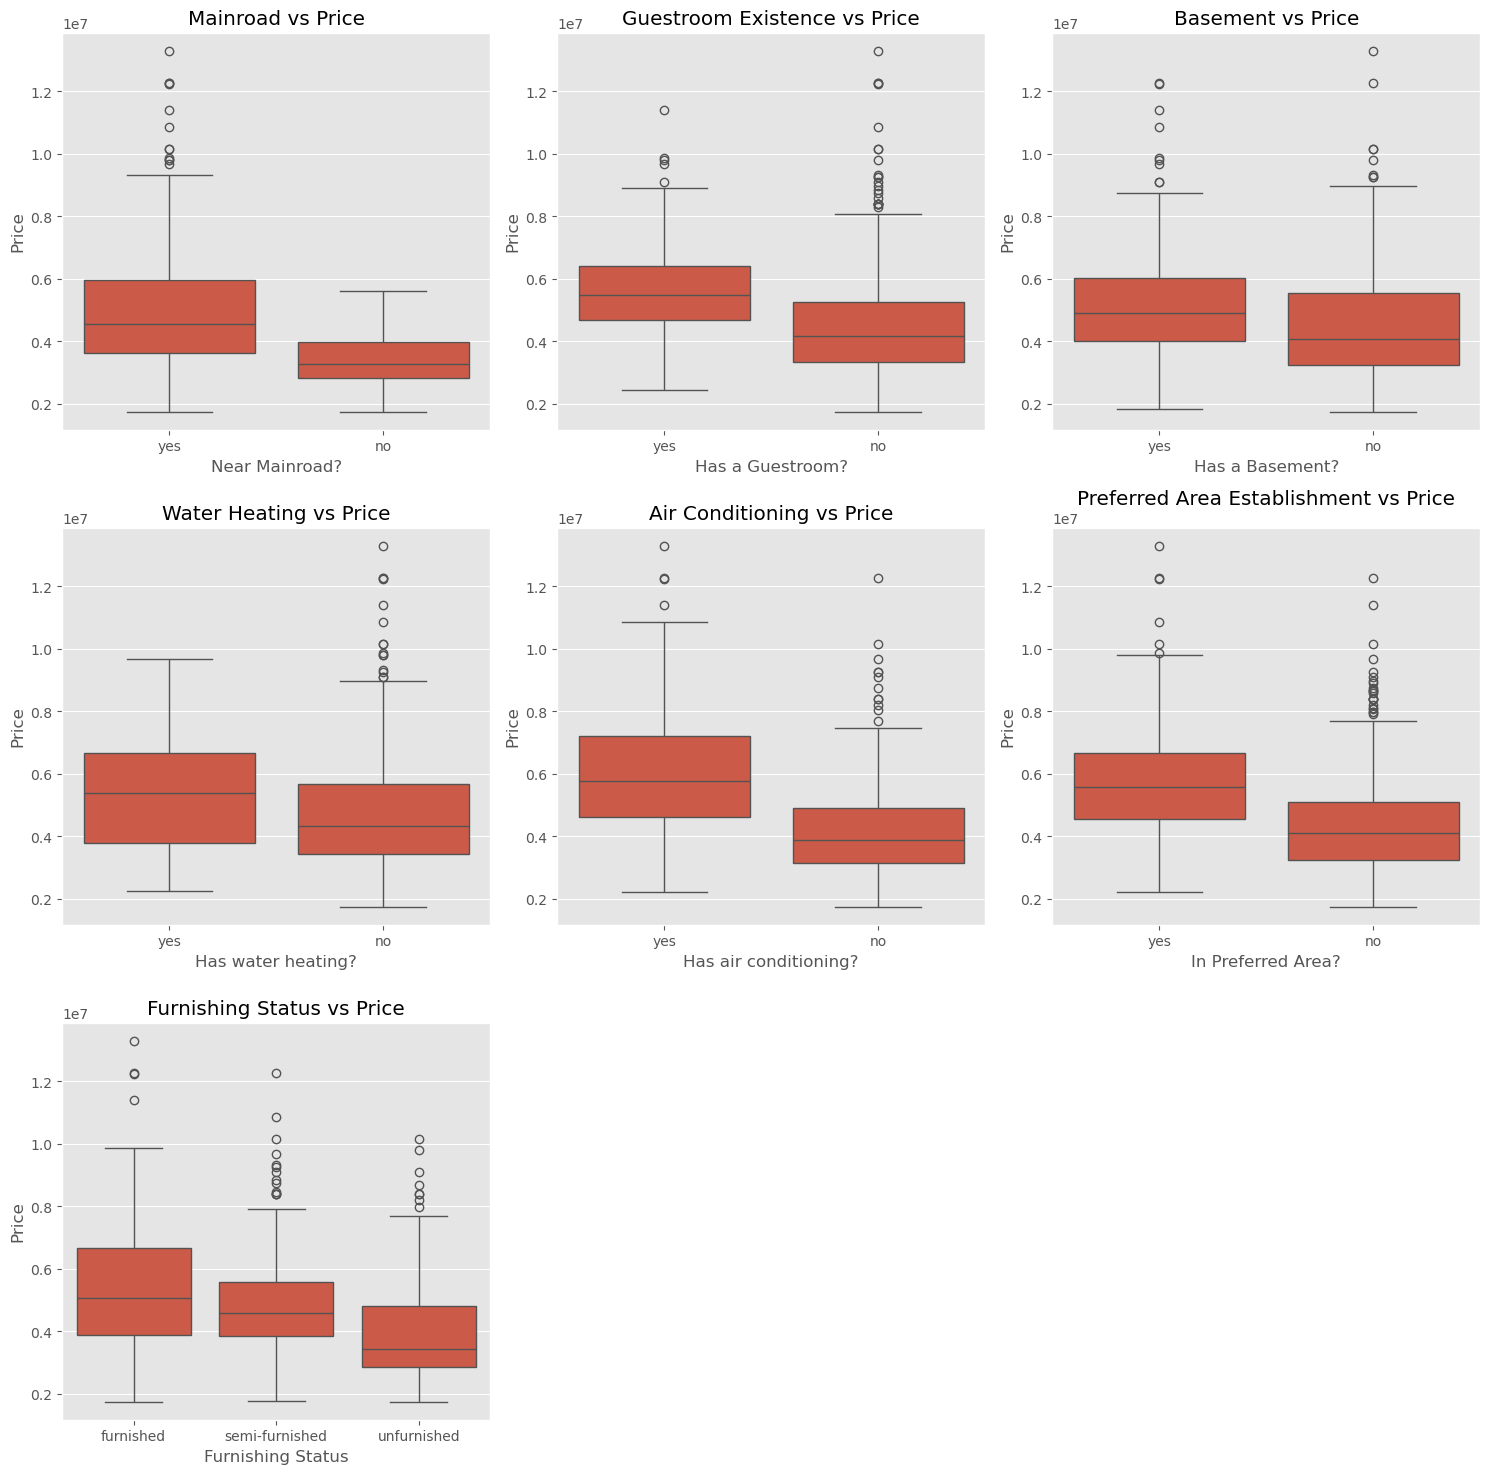

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.ravel()

custom_labels = {
    'mainroad' : ('Mainroad vs Price', 'Near Mainroad?', 'Price'),
    'guestroom' : ('Guestroom Existence vs Price', 'Has a Guestroom?', 'Price'),
    'basement' : ('Basement vs Price', 'Has a Basement?', 'Price'),
    'hotwaterheating' : ('Water Heating vs Price', 'Has water heating?', 'Price'),
    'airconditioning' : ('Air Conditioning vs Price', 'Has air conditioning?', 'Price'),
    'prefarea' : ('Preferred Area Establishment vs Price', 'In Preferred Area?', 'Price'),
    'furnishingstatus' : ('Furnishing Status vs Price', 'Furnishing Status', 'Price'),
}

columns = list(custom_labels.keys())
categorical_cols = list(df.select_dtypes(include='object'))

for i, col in enumerate(columns):
    ax = axes[i]
    title, xlabel, ylabel = custom_labels[col]

    order = ['yes', 'no']
    if col == 'furnishingstatus':
        order = ['furnished', 'semi-furnished', 'unfurnished']
    ax = sns.boxplot(data=df, x=col, y='price', ax=ax, order=order)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Things we can infer from this:
-When a house is near a main road, it seems to have a higher price
-Generally, a house with a guestroom has higher price, but some without guestrooms are pricier
-A house with water heating and a basement has a weak positive correlation with price
-A house with air conditioning, constructed in a preferred area, and is furnished, are priced higher in general

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
train_data = x_train.join(y_train)
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,amenity_score,price
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished,2,7525000
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished,3,6300000
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished,3,3920000
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished,3,3430000
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished,1,3010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished,2,6755000
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished,4,6160000
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished,2,4340000
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished,1,3290000


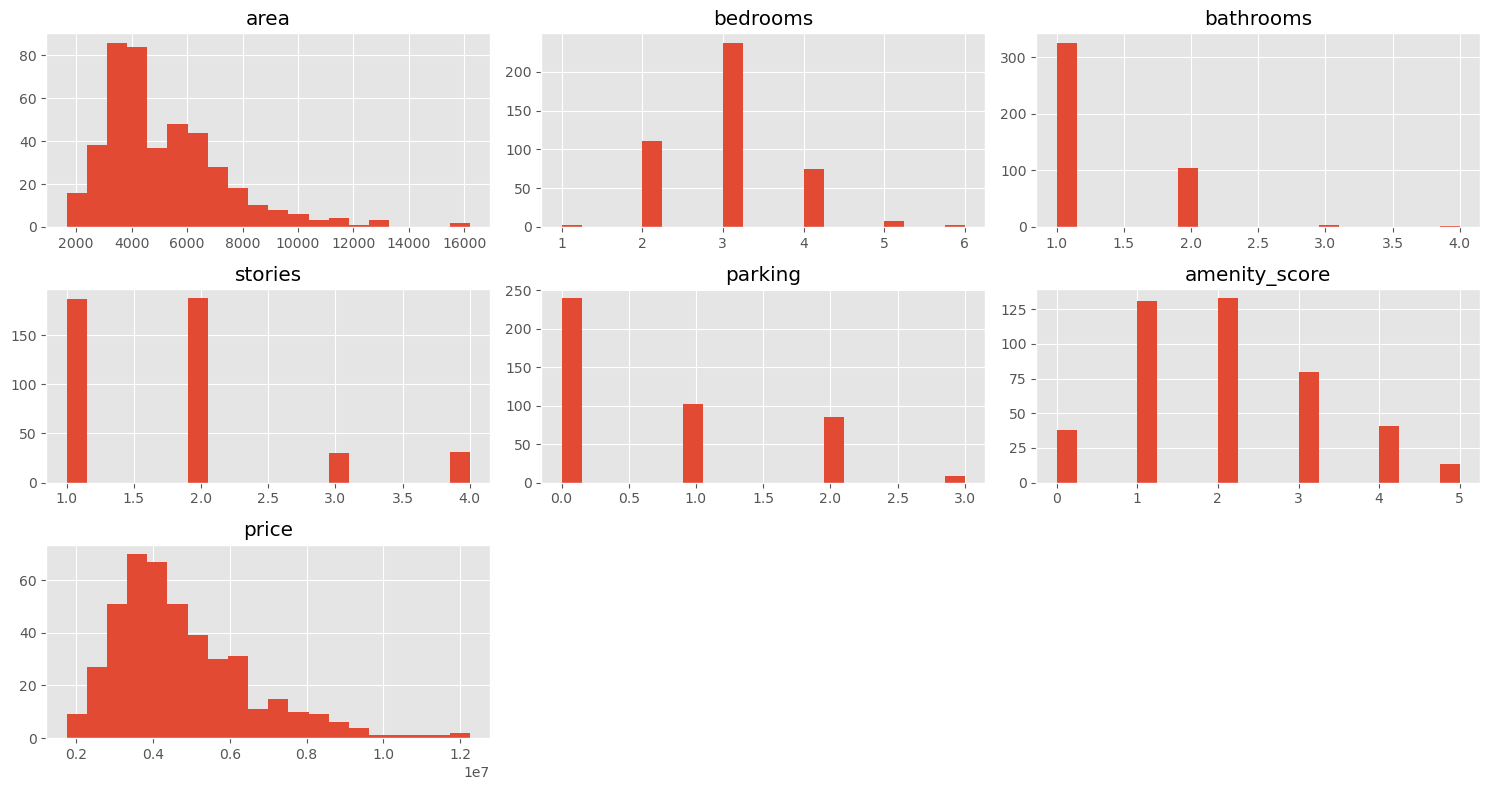

In [78]:
train_data.hist(bins=20, figsize=(15,8))
plt.tight_layout()

<Axes: >

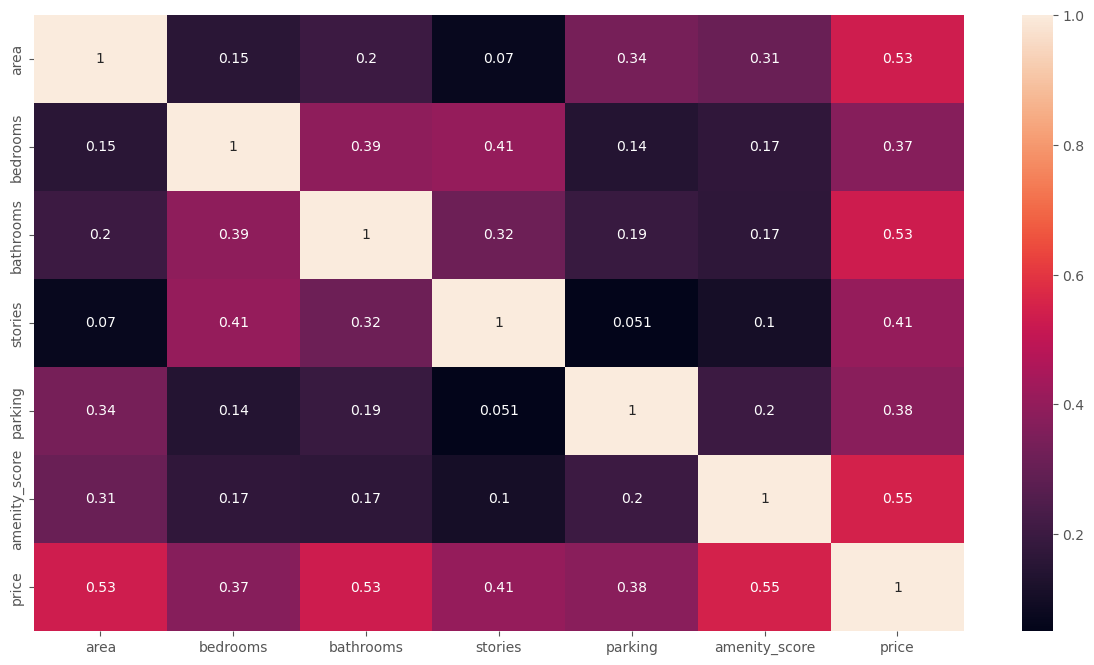

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True)

In [80]:
train_data['price'] = np.log(train_data['price'] + 1)
train_data['area'] = np.log(train_data['area'] + 1)

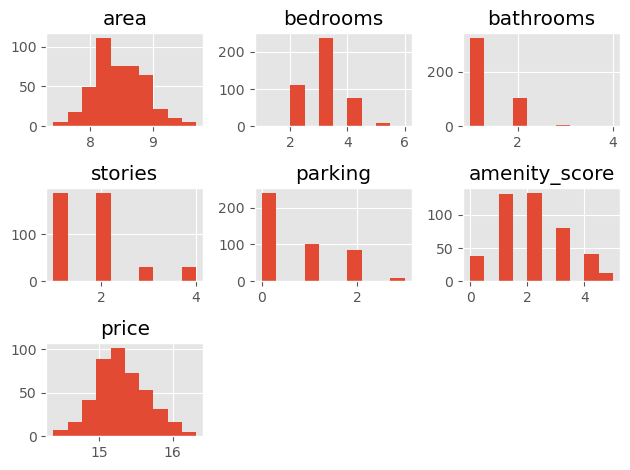

In [81]:
train_data.hist()
plt.tight_layout()

In [82]:
categorical_list_fortest = list(df.select_dtypes(include='object'))
categorical_list_fortest

train_data = pd.get_dummies(train_data, columns=categorical_list_fortest, dtype=int)
train_data

,area,bedrooms,bathrooms,stories,parking,amenity_score,price,mainroad_no,mainroad_yes,guestroom_no,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,8.699681,3,2,4,1,2,15.833742,0,1,1,...,0,1,0,0,1,1,0,1,0,0
93,8.881975,3,2,1,3,3,15.656060,0,1,1,...,1,1,0,0,1,1,0,0,1,0
335,8.247220,2,1,1,2,3,15.181602,0,1,1,...,1,1,0,0,1,1,0,1,0,0
412,7.867489,3,1,2,0,3,15.048071,0,1,1,...,1,1,0,1,0,0,1,0,0,1
471,8.229778,3,1,2,0,1,14.917451,0,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.699681,4,2,4,0,2,15.725794,0,1,1,...,0,1,0,0,1,1,0,0,0,1
106,8.603554,4,2,1,0,4,15.633587,0,1,1,...,1,1,0,0,1,0,1,0,1,0
270,8.412055,3,2,3,1,2,15.283385,0,1,1,...,0,0,1,1,0,1,0,1,0,0
435,8.304247,2,1,1,0,1,15.006398,0,1,1,...,0,1,0,1,0,1,0,0,0,1


<Axes: >

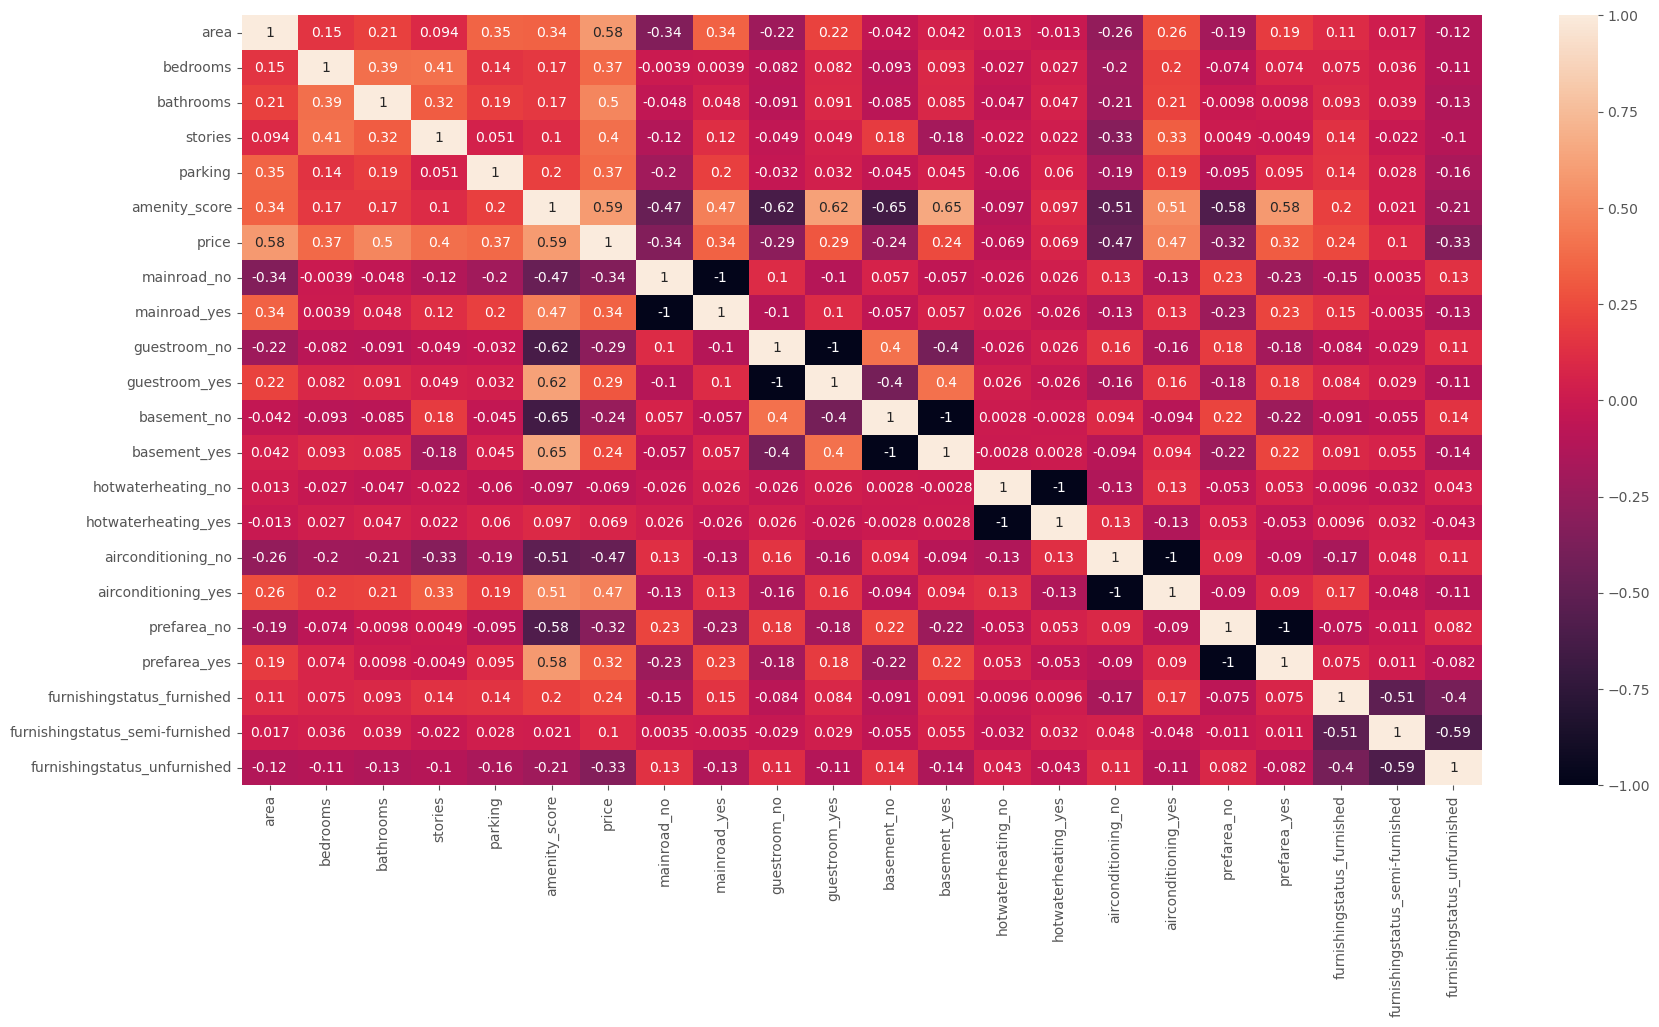

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), annot=True)

In [84]:
test_data = x_test.join(y_test)
test_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,amenity_score,price
316,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished,1,4060000
77,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished,3,6650000
360,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished,1,3710000
90,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished,2,6440000
493,3960,3,1,1,yes,no,no,no,no,0,no,furnished,1,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,2,9100000
357,6930,4,1,2,no,no,no,no,no,1,no,furnished,0,3773000
39,6000,4,2,4,yes,no,no,no,yes,1,no,semi-furnished,2,7910000
54,6000,3,2,2,yes,yes,no,no,yes,1,no,semi-furnished,3,7350000


In [85]:
test_data['price'] = np.log(test_data['price'] + 1)
test_data['area'] = np.log(test_data['area'] + 1)

In [86]:
categorical_list_fortest = list(df.select_dtypes(include='object'))
categorical_list_fortest

test_data = pd.get_dummies(test_data, columns=categorical_list_fortest, dtype=int)
test_data

,area,bedrooms,bathrooms,stories,parking,amenity_score,price,mainroad_no,mainroad_yes,guestroom_no,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,8.682877,4,2,2,1,1,15.216694,1,0,1,...,1,1,0,1,0,1,0,0,0,1
77,8.779711,3,2,3,0,3,15.710128,0,1,1,...,0,1,0,0,1,0,1,1,0,0
360,8.304247,2,1,1,0,1,15.126543,0,1,1,...,0,1,0,1,0,1,0,0,1,0
90,8.517393,3,1,2,0,2,15.678039,0,1,1,...,0,1,0,0,1,1,0,0,1,0
493,8.284252,3,1,1,0,1,14.845130,0,1,1,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,8.699681,4,1,2,2,2,16.023785,0,1,1,...,1,1,0,1,0,1,0,0,1,0
357,8.843759,4,1,2,1,0,15.143381,1,0,1,...,0,1,0,1,0,1,0,1,0,0
39,8.699681,4,2,4,1,2,15.883638,0,1,1,...,0,1,0,0,1,1,0,0,1,0
54,8.699681,3,2,2,1,3,15.810211,0,1,0,...,0,1,0,0,1,1,0,0,1,0


In [87]:
print(df.shape, train_data.shape, test_data.shape)

(545, 14) (436, 22) (109, 22)


In [88]:
categorical_list_fortest = list(df.select_dtypes(include='object'))
categorical_list_fortest

df = pd.get_dummies(df, columns=categorical_list_fortest, dtype=int)
df

,price,area,bedrooms,bathrooms,stories,parking,amenity_score,mainroad_no,mainroad_yes,guestroom_no,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,3,0,1,1,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,2,0,1,1,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,3,0,1,1,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,4,0,1,1,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,4,0,1,0,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,2,0,1,1,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [89]:
print(df.shape, train_data.shape, test_data.shape)

(545, 22) (436, 22) (109, 22)


In [90]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

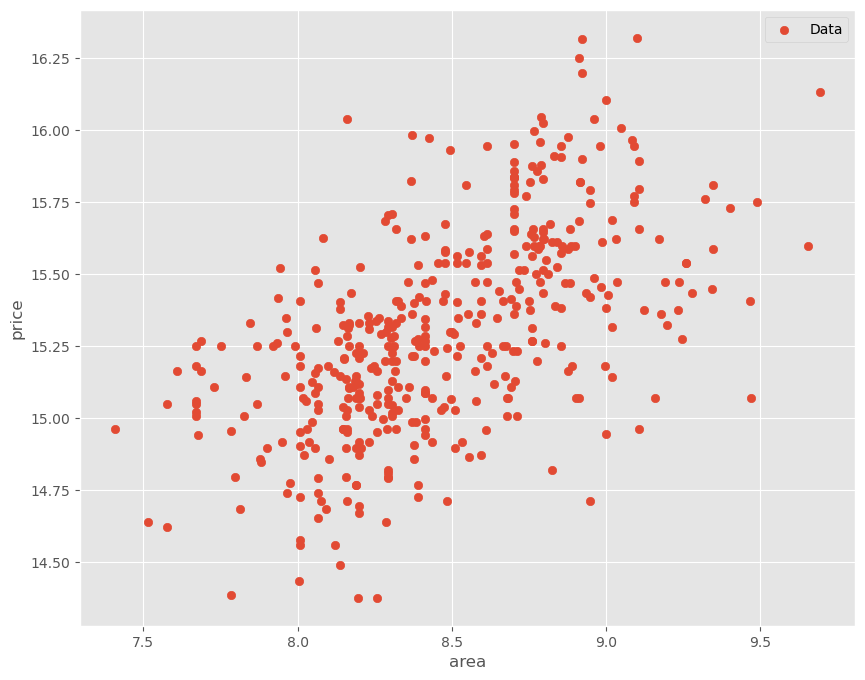

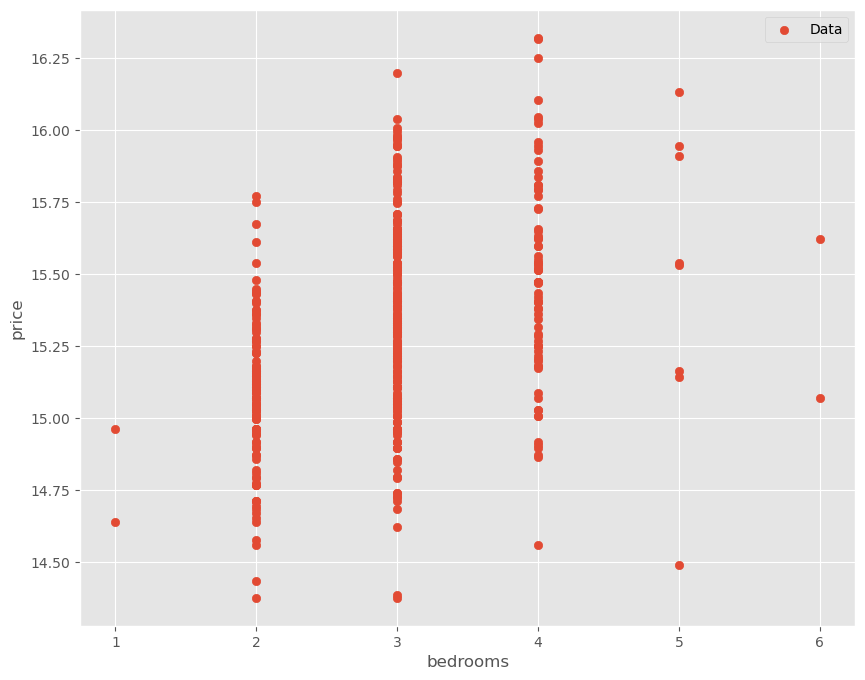

In [91]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10,8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.legend()

plot('area')
plot('bedrooms')

In [93]:
train_data.describe()

,area,bedrooms,bathrooms,stories,parking,amenity_score,price,mainroad_no,mainroad_yes,guestroom_no,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,...,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,8.466776,2.958716,1.266055,1.782110,0.685780,1.986239,15.301071,0.142202,0.857798,0.821101,...,0.357798,0.949541,0.050459,0.692661,0.307339,0.766055,0.233945,0.254587,0.431193,0.314220
std,0.397988,0.747804,0.477391,0.858093,0.854941,1.216663,0.353065,0.349658,0.349658,0.383708,...,0.479903,0.219141,0.219141,0.461921,0.461921,0.423824,0.423824,0.436129,0.495812,0.464738
min,7.409136,1.000000,1.000000,1.000000,0.000000,0.000000,14.375127,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.188967,2.000000,1.000000,1.000000,0.000000,1.000000,15.067773,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8.412055,3.000000,1.000000,2.000000,0.000000,2.000000,15.272025,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.757941,3.000000,2.000000,2.000000,1.000000,3.000000,15.538277,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,9.692828,6.000000,4.000000,4.000000,3.000000,5.000000,16.321037,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
normalizer = layers.Normalization()

normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[8.466776   2.9587157  1.266055   1.7821101  0.6857798  1.9862385
  0.14220184 0.85779816 0.8211009  0.17889908 0.64220184 0.35779816
  0.9495413  0.05045871 0.69266057 0.30733946 0.76605505 0.23394495
  0.25458714 0.43119267 0.3142202 ]]


In [103]:
first = np.array(train_features[:1])
print('first example: ', first)
print('Normalized: ', normalizer(first).numpy())


first example:  [[8.6996814 3.        2.        4.        1.        2.        0.
  1.        1.        0.        1.        0.        1.        0.
  0.        1.        1.        0.        1.        0.        0.       ]]
Normalized:  [[ 0.58587974  0.05527081  1.5391734   2.5876434   0.36795667  0.01132386
  -0.40715528  0.40715528  0.46677315 -0.46677306  0.74642    -0.74642
   0.23052141 -0.23052135 -1.5012434   1.5012434   0.55262035 -0.55262035
   1.7111189  -0.870669   -0.67690027]]


In [129]:
#Regression Sample Problem

feature = 'area'
single_feature = np.array(train_features[feature]).reshape(-1, 1)
print(single_feature.shape, train_features.shape)


single_feature_normalizer = layers.Normalization()
single_feature_normalizer.adapt(np.array(single_feature))


(436, 1) (436, 21)


In [132]:
single_feature_model = keras.Sequential([single_feature_normalizer, 
                                                layers.Dense(1)
                                               ])
single_feature_model.build(input_shape=(None, 1))

In [133]:
single_feature_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [137]:
loss = keras.losses.MeanAbsoluteError()
optimizer = keras.optimizers.Adam(learning_rate=0.1)

single_feature_model.compile(optimizer=optimizer, loss=loss)


In [138]:
history = single_feature_model.fit(
    train_features[feature], train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 15.0225 - val_loss: 14.2166
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.8991 - val_loss: 13.1968
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.7812 - val_loss: 12.1541
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.7295 - val_loss: 11.0859
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.5100 - val_loss: 10.0687
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.3886 - val_loss: 9.0222
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.3928 - val_loss: 7.9481
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.1803 - val_loss: 6.9079
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.0390 - val_loss: 5.8512
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0080 - val_loss: 4.7426
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.1272 - val_loss: 3.5784
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s

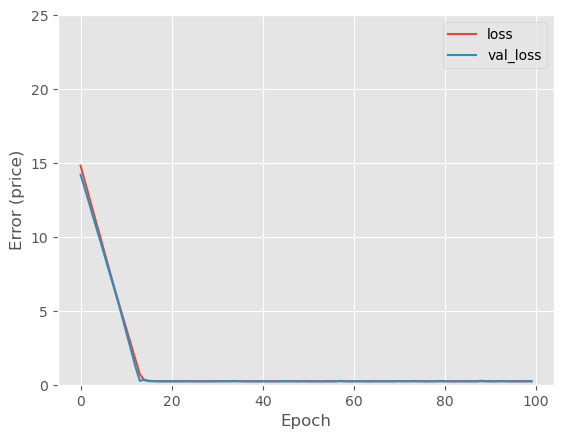

In [139]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,25])
    plt.xlabel('Epoch')
    plt.ylabel('Error (price)')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [140]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2898


0.29091528058052063

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


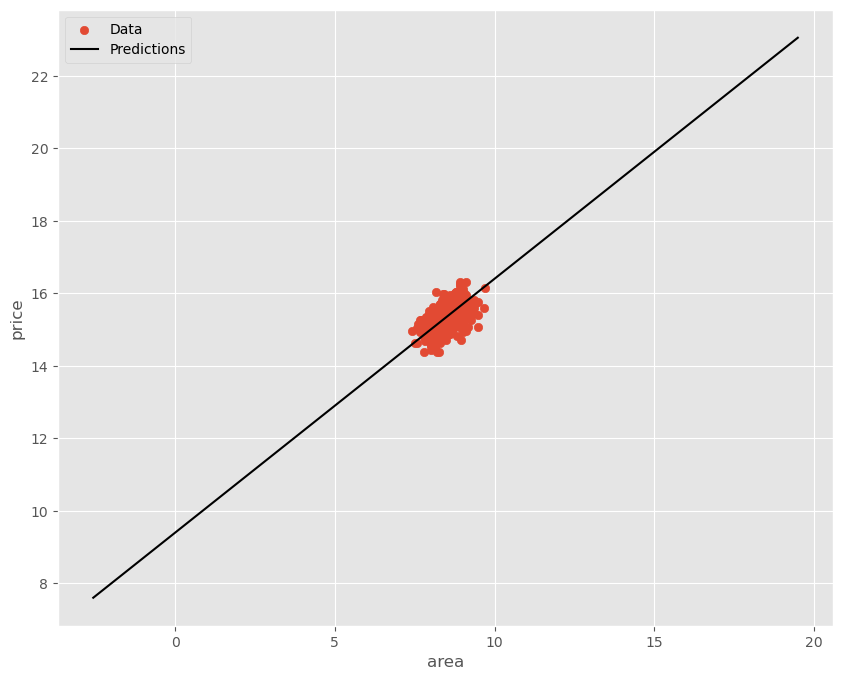

In [141]:
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)

plot(feature, x, y)

In [151]:
# Deep Neural Network

dnn_model = keras.Sequential(
    [
        single_feature_normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ]
)

In [153]:
dnn_model.compile(
    loss=loss,
    optimizer=tf.keras.optimizers.Adam(0.001),
)

dnn_model.build(input_shape=(None, 1))
dnn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,516 (33.27 KB)

 Trainable params: 8,513 (33.25 KB)

 Non-trainable params: 3 (16.00 B)

In [155]:
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split=0.2,
    verbose=1,
    epochs=150
)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2334 - val_loss: 0.2305
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2271 - val_loss: 0.2358
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2182 - val_loss: 0.2493
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2403 - val_loss: 0.2349
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2124 - val_loss: 0.2335
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2156 - val_loss: 0.2458
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2297 - val_loss: 0.2525
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2267 - val_loss: 0.2631
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2305 - val_loss: 0.2312
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2209 - val_loss: 0.2450
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2366 - val_loss: 0.2727
Epoch 12/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

In [156]:
dnn_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3132


0.3026108741760254

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


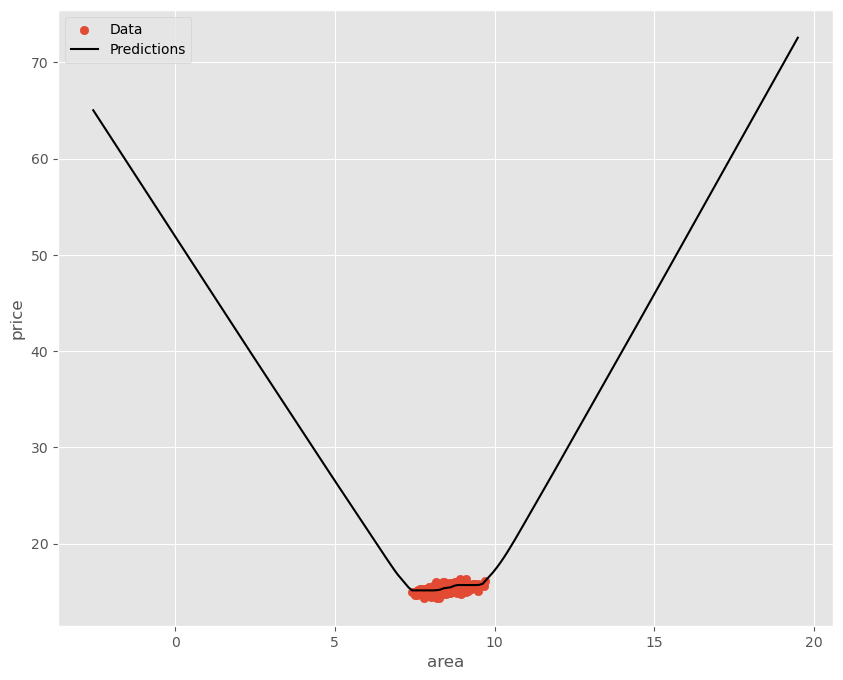

In [157]:
x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x)

plot(feature, x, y)

In [1]:
print('github test')

github test
